In [1]:
import os

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from utils.utility_functions import compute_vignette_mask

In [2]:
# I/O
# output directory
out = os.path.join(os.getcwd(), 'output/vignette_example')
if not os.path.exists(out):
    os.makedirs(out)

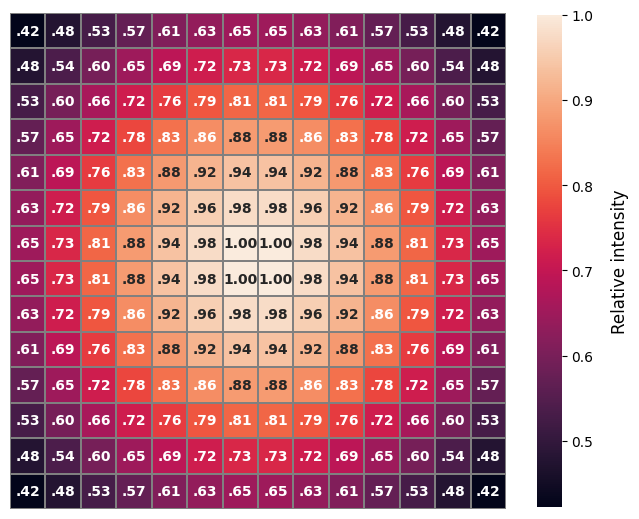

In [10]:
# simulating 14-pixel image patches with a 7-pixel standard deviation
std_dev=7

mask, vmin, vamx = compute_vignette_mask(window_size=14, std_dev=std_dev) 

# plot annotated mask heatmap
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.heatmap(
    mask[0, :, :, 0], annot=True, square=True, linewidths=0.25, 
    linecolor='gray', ax=ax, annot_kws={"size": 10, "weight": "bold"}, cbar_kws={'shrink': 0.8}
)
        
def remove_leading_zeros(x):
    # convert the text to float and then format it to remove leading zeros
    value = float(x.get_text())
    return '{:.2f}'.format(value).lstrip('0').replace('-0.', '-.')

# apply custom annotation function to the heatmap
for text in g.texts:
    text.set_text(remove_leading_zeros(text))

plt.xticks([])
plt.yticks([])

cbar = ax.collections[0].colorbar
cbar.set_label('Relative intensity', size=12, labelpad=13)

fig.savefig(os.path.join(out, f'vignette{std_dev}.pdf'), bbox_inches='tight')
plt.show()
plt.close('all')